MIGUEL CHAVEINTE GARCÍA


In [3]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import models
from keras import layers

In [4]:
import numpy as np
import pandas as pd

RED CONVOLUTIVA

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#Entrada 28x28
#Salida 26x26

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

DATOS

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

MAIN PROGRAM

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_data=(test_images,test_labels))

Epoch 1/20
938/938 [==============================] - 75s 78ms/step - loss: 0.6520 - accuracy: 0.7592 - val_loss: 0.5376 - val_accuracy: 0.8079
Epoch 2/20
938/938 [==============================] - 64s 68ms/step - loss: 0.4349 - accuracy: 0.8389 - val_loss: 0.4650 - val_accuracy: 0.8314
Epoch 3/20
938/938 [==============================] - 62s 66ms/step - loss: 0.3689 - accuracy: 0.8654 - val_loss: 0.4045 - val_accuracy: 0.8528
Epoch 4/20
938/938 [==============================] - 62s 67ms/step - loss: 0.3308 - accuracy: 0.8782 - val_loss: 0.3900 - val_accuracy: 0.8610
Epoch 5/20
938/938 [==============================] - 65s 70ms/step - loss: 0.3003 - accuracy: 0.8882 - val_loss: 0.3598 - val_accuracy: 0.8676
Epoch 6/20
938/938 [==============================] - 63s 67ms/step - loss: 0.2784 - accuracy: 0.8970 - val_loss: 0.3222 - val_accuracy: 0.8845
Epoch 7/20
938/938 [==============================] - 62s 66ms/step - loss: 0.2594 - accuracy: 0.9049 - val_loss: 0.3222 - val_accuracy:

REPRESENTACIÓN GRÁFICA

In [8]:
import matplotlib.pyplot as plt

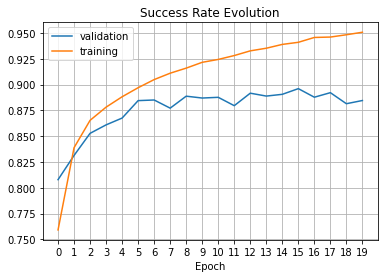

In [9]:
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.legend()
plt.title('Success Rate Evolution')
plt.xlabel('Epoch')
plt.grid()
plt.xticks(history.epoch)
plt.show()

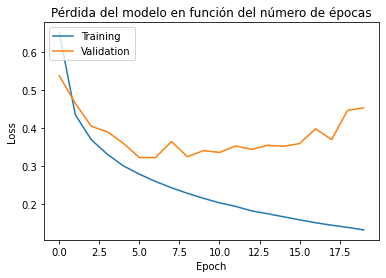

In [10]:
# Graficar la pérdida del entrenamiento y la validación
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo en función del número de épocas')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'], loc='upper left')
plt.show()

Evaluating the model

In [32]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)



Test loss: 0.4529157280921936
Test accuracy: 0.8845999836921692
